**Đề tài:** Titanic: Machine Learning from Disaster


*   List item
*   List item



**Tên nhóm:** CTT2 - **STT:** 7

**Hạng:** 418 - **Điểm:** 0.83253


In [ ]:
#Import thư viện 

# NumPy
import numpy as np

# Dataframe operations
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Models
#from sklearn.linear_model import LogisticRegression #logistic regression
#from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
#from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Cross-validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import cross_validate

# GridSearchCV
from sklearn.model_selection import GridSearchCV

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix
from IPython.display import Image


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **1/ Khám phá dữ liệu**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/Titanic'
%pwd

/content/drive/My Drive/Colab Notebooks/Titanic


'/content/drive/My Drive/Colab Notebooks/Titanic'

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
data_df = train_df.append(test_df) # Tập dữ liệu gồm: train + test.

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Thông tin rập dữ liệu huấn luyện
train_df.info()
print('-'*100)
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------------------------------------------------------------------


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
col=['Survived','Pclass','Sex','SibSp','Parch','Ticket','Cabin','Embarked']
for i in col:
  print(i)
  print(train_df[i].value_counts())
  print('-'*100)

Survived
0    549
1    342
Name: Survived, dtype: int64
----------------------------------------------------------------------------------------------------
Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
----------------------------------------------------------------------------------------------------
Sex
male      577
female    314
Name: Sex, dtype: int64
----------------------------------------------------------------------------------------------------
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
----------------------------------------------------------------------------------------------------
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
----------------------------------------------------------------------------------------------------
Ticket
1601        7
347082      7
CA. 2343    7
CA 2144     6
3101295     6
           ..
371060      1
347743      1
248723      1

In [ ]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


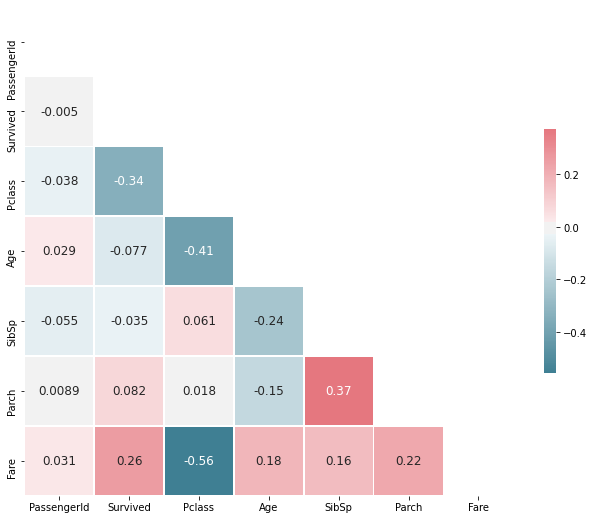

In [ ]:
corr=data_df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, 
            square=True,linewidths=.5, cbar_kws={'shrink':0.5 },annot=True, annot_kws={'fontsize':12 }
)

#**II/ Tiền xử lý**

In [ ]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(15,9))

## 1/ Age

Chúng ta sẽ bắt đầu xử lý thuộc tính Age.

Đầu tiên cần phải xử lý các giá trị khuyết. Chúng ta nhận thấy rằng, tùy theo mỗi độ tuổi khác nhau mà mỗi người sẽ có title (chức vị) như: Miss hay Ms. Do đó chúng ta có thể tính độ tuổi cho từng chức vị này (tính theo median) rồi điền vào vào những vị trí bị khuyết tương ứng

In [ ]:
# Chúng ta tạo thêm feature Title
data_df['Title'] = data_df['Name']
# Lấy title của mỗi mẫu từ Name
for name_string in data_df['Name']:
    d=data_df['Title'] = data_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
data_df['Title'].value_counts()
train_df['Title'] = data_df['Title'][:891]
test_df['Title'] = data_df['Title'][891:]
data_df['Title'].value_counts()


Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Ms            2
Mlle          2
Don           1
Mme           1
Lady          1
Capt          1
Jonkheer      1
Dona          1
Countess      1
Sir           1
Name: Title, dtype: int64

In [ ]:
# Thay thế Title có tần số xuất hiện ít bằng những title phổ biến hơn (vẫn giữ nguyên giới tính)
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
data_df.replace({'Title': mapping}, inplace=True)
train_df['Title'] = data_df['Title'][:891]
test_df['Title'] = data_df['Title'][891:]
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
#Điền những giá trị Age bị missing theo Title
for title in titles:
    age_to_impute = data_df.groupby('Title')['Age'].median()[titles.index(title)]
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == title), 'Age'] = age_to_impute
train_df['Age'] = data_df['Age'][:891]
test_df['Age'] = data_df['Age'][891:]

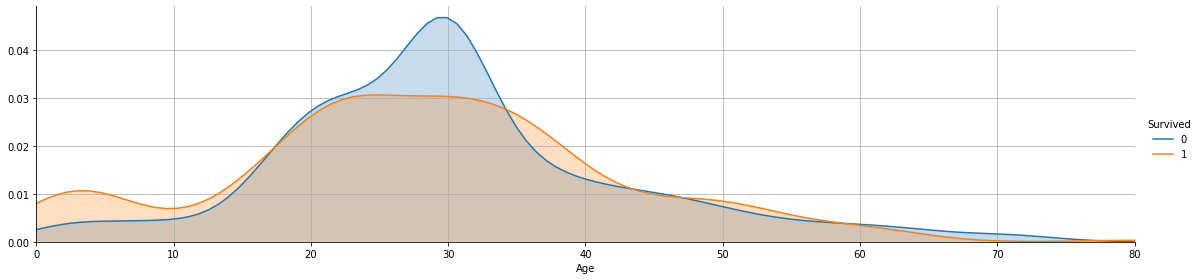

In [ ]:
facet = sns.FacetGrid(train_df, hue="Survived",height=4,aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
plt.grid()
plt.show()

Trong vùng từ [23,34] dường như có độ chênh lệch khá lớn giữa tỷ lệ: 
(Survived=0)/ (Survived=1)

In [ ]:
# Tạo feature 'Mid', feature có vai trò cho biết những ai có độ tuổi trong khoảng 24 - 23
age=list(data_df['Age'])
for i in range(len(age)):
    if(age[i]<=33 and age[i]>24):
        age[i]=1
    else:
        age[i]=0
data_df['Mid']=age
train_df['Mid'] = data_df['Mid'][:891]
test_df['Mid'] = data_df['Mid'][891:]

train_df.drop(['Age'], 1, inplace=True)
test_df.drop(['Age'], 1, inplace=True)

## 2/ Title

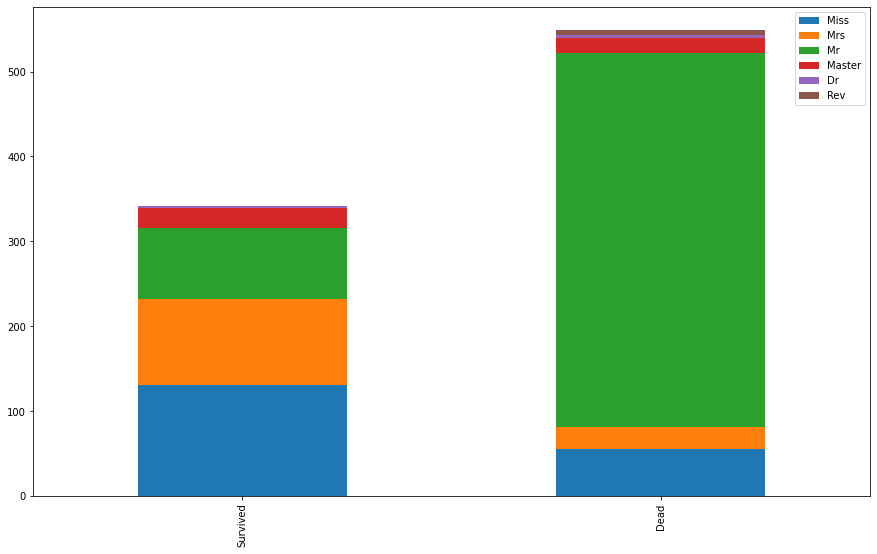

In [ ]:
bar_chart('Title')

Ta thấy rằng, mỗi title sẽ có tỷ lệ sống sót khác nhau, do đó ta đặt trọng số cho mỗi Title

In [ ]:
mapping = {'Dr': 5, 'Master': 6, 'Miss': 10, 'Mr': 2, 'Mrs': 11, 'Rev': 0}
data_df.replace({'Title': mapping}, inplace=True)
train_df['Title'] = data_df['Title'][:891]
test_df['Title'] = data_df['Title'][891:]

## 3/ Family_Survival


Tại đây chúng ta sẽ tạo thêm feature Family_Size. Feature này cho biết số thành viên trong cùng 1 gia đình trên chuyến tàu. Bởi có nhiều khả năng những gia đình càng đông thành viên thì khả năng chết cả gia đình rất cao

In [ ]:
data_df['Family_Size'] = data_df['Parch'] + data_df['SibSp']

# Substituting Age values in TRAIN_DF and TEST_DF:
train_df['Family_Size'] = data_df['Family_Size'][:891]
test_df['Family_Size'] = data_df['Family_Size'][891:]

size=list(data_df['Family_Size'])
for i in range(len(size)):
    if(size[i]>=4):
        size[i]=1
    else:
        size[i]=0
data_df['Big']=size
train_df['Big'] = data_df['Big'][:891]
test_df['Big'] = data_df['Big'][891:]

Chúng ta sẽ thêm feature Family_Survival. Feature này cho biết các thành viên trong gia đình với hành khách có sống sót hay không? Tuy nhiên, làm thế nào để tìm ra các hành khách thuộc cùng gia đình? Ta sẽ giả sử rằng: hai khành hách có cùng họ và có cùng giá vé sẽ thuộc 1 gia đình

In [ ]:
data_df['Last_Name'] = data_df['Name'].apply(lambda x: str.split(x, ",")[0])
data_df['Fare'].fillna(data_df['Fare'].mean(), inplace=True)

DEFAULT_SURVIVAL_VALUE = 0.35
data_df['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in data_df[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1):
        # A Family group is found.
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 0

print("Number of passengers with family survival information:", 
      data_df.loc[data_df['Family_Survival']!=0.35].shape[0])

Number of passengers with family survival information: 420


Vẫn còn 1 trường hợp khác làm giảm khả năng sống. Đó là những hành khác đi chung với nhau theo nhóm: ví dụ như bạn bè. Chúng ta sẽ giả sử những hành khách mà có cùng 1 vé thì đi theo nhóm với nhau.

In [ ]:
for _, grp_df in data_df.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.35):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 0
                        
print("Number of passenger with family/group survival information: " 
      +str(data_df[data_df['Family_Survival']!=0.35].shape[0]))

# # Family_Survival in TRAIN_DF and TEST_DF:
train_df['Family_Survival'] = data_df['Family_Survival'][:891]
test_df['Family_Survival'] = data_df['Family_Survival'][891:]

Number of passenger with family/group survival information: 546


## 4/ Fare


Chúng ta cần phải rời rạc hóa thuộc tính này


In [ ]:
data_df['Fare'].fillna(data_df['Fare'].median(), inplace = True)

# Making Bins
data_df['FareBin'] = pd.qcut(data_df['Fare'], 5)

label = LabelEncoder()
data_df['FareBin_Code'] = label.fit_transform(data_df['FareBin'])

train_df['FareBin_Code'] = data_df['FareBin_Code'][:891]
test_df['FareBin_Code'] = data_df['FareBin_Code'][891:]

train_df.drop(['Fare'], 1, inplace=True)
test_df.drop(['Fare'], 1, inplace=True)


##5/ Sex


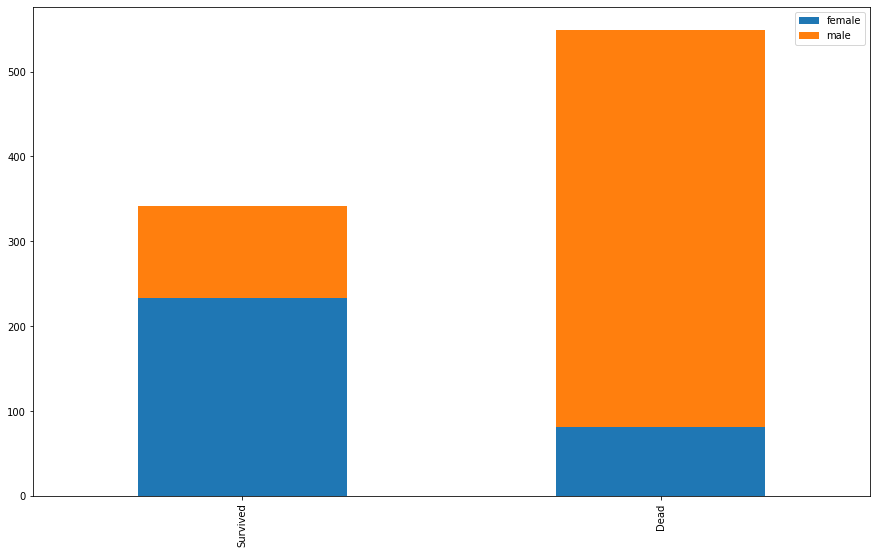

In [ ]:
bar_chart('Sex')

Giữa Nam và Nữ có sự chênh lệch về tỷ lệ sống / chết. Dường như có vẻ tỷ lệ sống sót của phụ nữ cao hơn. Do đó, ta đặt trọng số cho giới tính nữ

In [ ]:
train_df['Sex'].replace(['male','female'],[0,10],inplace=True)
test_df['Sex'].replace(['male','female'],[0,10],inplace=True)

##6/ Plcass:

In [ ]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w",retina=True)


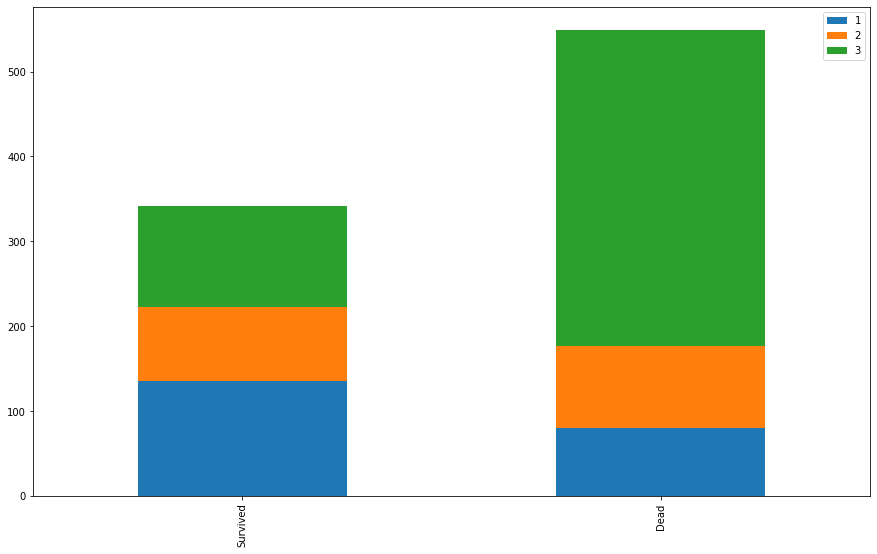

In [ ]:
bar_chart('Pclass')

Mỗi Plass có tỷ lệ sống sót khác nhau, ta cần phải đặt trọng số cho mỗi Pclass

In [ ]:
train_df['Pclass'].replace([1,2,3],[1,5,14],inplace=True)
test_df['Pclass'].replace([1,2,3],[1,5,14],inplace=True)


## 7/ Xóa đi những feature không có giá trị

In [ ]:
train_df.drop(['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
               'Embarked'], axis = 1, inplace = True)
test_df.drop(['Name','PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
              'Embarked'], axis = 1, inplace = True)

In [ ]:
test_df.to_csv("test_df.csv")

##8/ Tách label và feature:

In [ ]:
X = train_df.drop('Survived', 1)
y = train_df['Survived']
X_test = test_df.copy()

##9/ Scaling features

In [ ]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X_test = std_scaler.transform(X_test)

#**III/ BUILD MODEL** 

ở bước này, build model dựa trên X, y. Dự đoán trên tập dữ liệu X_test. (Hai cell liền trên)

Sử dụng độ đo **Accuracy** để đánh giá mô hình

## kNN

In [ ]:
n_neighbors = [1,2,3,4,5,6]
algorithm = ['auto']
weights = ['uniform', 'distance']
p=[2]
leaf_size =list(range(26,37,2))
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors, 'p': p}
gd_KNN=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
                cv=10, scoring = "roc_auc")
gd_KNN.fit(X, y)
print(gd_KNN.best_score_)
print(gd_KNN.best_estimator_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.860770874006168
KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    3.1s finished


 - **Sử dụng grid searching để tìm thông số mô hình huấn luyện tốt nhất**

In [ ]:
gd_KNN.best_estimator_.fit(X, y)
y_pred=gd_KNN.best_estimator_.predict(X)
y_true=y.values
acc_knn=accuracy_score(y_true,y_pred)
acc_knn

0.8574635241301908

## RandomForest

- **Hyperparams RandomForest**

In [ ]:
#Hyperparameter Tune with GridSearchCV: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [10, 20,30,40,50]
grid_ratio = [.1, .2, .3, .4, .5]
grid_learn = [.01, .02, .03, .04, .05]
grid_max_depth = [1, 2,3,4,5]
grid_min_samples = [.01, .02, .03, .04, .05]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

In [ ]:
hyperparams={
            #RandomForestClassifier 
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }
gd_RF=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, verbose=True, 
                cv=10, scoring = "roc_auc")
gd_RF.fit(X, y)
print(gd_RF.best_score_)
print(gd_RF.best_estimator_)

- **Sử dụng grid searching để tìm thông số mô hình huấn luyện tốt nhất**

In [ ]:
gd_RF.best_estimator_.fit(X, y)
y_red=gd_RF.best_estimator_.predict(X)
y_true=y.values
acc_RF=accuracy_score(y_true,y_red)
acc_RF

0.856341189674523

## Decision Tree

- **Hyperparams**

In [ ]:
hyperparams={
            'criterion': grid_criterion,
            'max_depth': [1,2], #default 2,
            'random_state': grid_seed}

In [ ]:
gd_DT=GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = hyperparams, verbose=True, 
                cv=10, scoring = "roc_auc")
gd_DT.fit(X, y)
print(gd_DT.best_score_)
print(gd_DT.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 4 candidates, totalling 40 fits
0.8535145573380867
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


- **Sử dụng grid searching để tìm thông số mô hình huấn luyện tốt nhất**

In [ ]:
gd_DT.best_estimator_.fit(X, y)
y_pred=gd_DT.best_estimator_.predict(X)
y_true=y.values
acc_DT=accuracy_score(y_true,y_pred)
acc_DT

0.8338945005611672

## SVM

- **HyperParams**

In [ ]:
hyperparams={'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed}

In [ ]:
gd_SVC=GridSearchCV(estimator = SVC(), param_grid = hyperparams, verbose=True, 
                cv=4, scoring = "roc_auc")
gd_SVC.fit(X, y)
print(gd_SVC.best_score_)
print(gd_SVC.best_estimator_)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.879848532078135
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   11.5s finished


**Sử dụng grid searching để tìm thông số mô hình huấn luyện tốt nhất**

In [ ]:
gd_SVC.best_estimator_.fit(X, y)
y_pred=gd_SVC.best_estimator_.predict(X)
y_true=y.values
acc_SVC=accuracy_score(y_true,y_pred)
acc_SVC

0.8540965207631874

## XGB

- **HyperParams**

In [ ]:
hyperpagrams={
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,5,10,15,20], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }

In [ ]:
gd_XGB=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams, verbose=True, 
                cv=10, scoring = "roc_auc")
gd_XGB.fit(X, y)
print(gd_XGB.best_score_)
print(gd_XGB.best_estimator_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8956086636674874
XGBClassifier(C=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              decision_function_shape='ovo', gamma=0.5, learning_rate=0.1,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', probability=True, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   21.2s finished


- **Sử dụng grid searching để tìm thông số mô hình huấn luyện tốt nhất**

In [ ]:
gd_XGB.best_estimator_.fit(X, y)
y_pred=gd_XGB.best_estimator_.predict(X)
y_true=y.values
acc_XGB=accuracy_score(y_true,y_pred)
acc_XGB

0.8552188552188552

#**IV/ Đánh giá**

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',
              'Random Forest', 'Decision Tree','XGBClassifier'],
    'Score': [acc_SVC, acc_knn, acc_RF, acc_DT,acc_XGB]})
sorted_model=models.sort_values(by='Score', ascending=False)
sorted_model

,Model,Score
1,KNN,0.857464
2,Random Forest,0.856341
4,XGBClassifier,0.855219
0,Support Vector Machines,0.854097
3,Decision Tree,0.833895


In [ ]:
'''plt.figure(figsize=(15,7))
fig = plt.bar(sorted_model['Model'], sorted_model['Score'],color='aqua')
plt.grid()
plt.show()'''

In [ ]:
gd_KNN.best_estimator_.fit(X, y)
y_pred = gd_KNN.best_estimator_.predict(X_test)
temp = pd.DataFrame(pd.read_csv("test.csv")['PassengerId'])
temp['Survived'] = y_pred
temp.to_csv("submissionKNN.csv", index = False)

Tham khảo:

https://github.com/minsuk-heo/kaggle-titanic

https://www.kaggle.com/shunjiangxu/blood-is-thicker-than-water-friendship-forever

https://www.kaggle.com/vincentlugat/200-lines-randomized-search-lgbm-82-3/output?fbclid=IwAR3rNwKO5P3l3X3MNddqaROUSSYhRbHpdqSd9vzuepOXVpPefkLHvelCmdE